In [97]:
import pandas as pd

***Load Data***

In [98]:
df = pd.read_csv("../rawData/TikTok/top-250-tiktokers.csv")
df

,Rank,Username,Country,Followers,Views,Likes,Engagement,Brand Account,Gender,Age,Ethnicity,Famous,Genre,LGBTQ
0,1,@charlidamelio,U.S.A,78.9m,38.3m,6.1m,16.60%,0,Female,16.0,White,0.0,"Dancing, Lipsyncing, Lifestyle",0.0
1,2,@addisonre,U.S.A,53.7m,13.8m,2.8m,20.80%,0,Female,19.0,White,0.0,"Dancing, Lipsyncing",0.0
2,3,@zachking,U.S.A,47.3m,17.6m,2.8m,16%,0,Male,30.0,East Asian,1.0,"Comedy, Illusion",0.0
3,4,@lorengray,U.S.A,46.3m,3.2m,622.6k,19.70%,0,Female,18.0,White,1.0,"Dancing, Lipsyncing",0.0
4,5,@tiktok,U.S.A,45.3m,9.4m,503.0k,5.60%,1,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,252,@ramneeksingh1313,India,8.6m,479.1k,31.6k,6.70%,0,Male,35.0,South Asian,0.0,"Comedy, Acting",0.0
252,253,@amandacerny,U.S.A,8.6m,654.7k,95.2k,14.60%,0,Female,29.0,White,1.0,"Comedy, Lifestyle",0.0
253,254,@rahimabram,Russia,8.6m,1.6m,271.2k,17%,0,Male,22.0,White,1.0,"Lipsyncing, Promotion, Lifestyle",0.0
254,255,@johnnyorlando,U.S.A,8.6m,1.1m,245.4k,22.70%,0,Male,17.0,White,1.0,"Lipsyncing, Promotion, Lifestyle",0.0


***Data Preparation***

In this section we are looking to complete the following...

- Remove data that is not needed or biased
- Convert values into numerical values
- Handle Null/NaN values
- Seperate our data into x and y

In [99]:
df = df.drop('Rank', axis=1)
df = df.drop('LGBTQ', axis=1)
df = df.drop('Ethnicity', axis=1)
df = df.drop('Famous', axis=1)
df = df.drop('Gender', axis=1)
df = df.drop('Brand Account', axis=1)
df = df.drop('Age', axis=1)
df = df.drop('Username', axis=1)
df

,Country,Followers,Views,Likes,Engagement,Genre
0,U.S.A,78.9m,38.3m,6.1m,16.60%,"Dancing, Lipsyncing, Lifestyle"
1,U.S.A,53.7m,13.8m,2.8m,20.80%,"Dancing, Lipsyncing"
2,U.S.A,47.3m,17.6m,2.8m,16%,"Comedy, Illusion"
3,U.S.A,46.3m,3.2m,622.6k,19.70%,"Dancing, Lipsyncing"
4,U.S.A,45.3m,9.4m,503.0k,5.60%,NaN
...,...,...,...,...,...,...
251,India,8.6m,479.1k,31.6k,6.70%,"Comedy, Acting"
252,U.S.A,8.6m,654.7k,95.2k,14.60%,"Comedy, Lifestyle"
253,Russia,8.6m,1.6m,271.2k,17%,"Lipsyncing, Promotion, Lifestyle"
254,U.S.A,8.6m,1.1m,245.4k,22.70%,"Lipsyncing, Promotion, Lifestyle"


In [100]:
df.dtypes

Country       object
Followers     object
Views         object
Likes         object
Engagement    object
Genre         object
dtype: object

In [101]:
# Turn the analytics into numbers

# Function to convert numbers of types string to float
def string_to_num(s):
    if 'm' in s:
        return float(s.replace('m', '')) * 1e6
    elif 'k' in s:
        return float(s.replace('k', '')) * 1e3
    else:
        return float(s)
    
    
# Convert column values to floats
df['Followers'] = df['Followers'].apply(string_to_num)
df['Views'] = df['Views'].apply(string_to_num)
df['Likes'] = df['Likes'].apply(string_to_num)
    
# Convert percents into decimal values
df['Engagement'] = df['Engagement'].str.rstrip('%')
df['Engagement'] = df['Engagement'].astype('float') / 100.0
df['Engagement'] = df['Engagement'].round(3)
    
df

,Country,Followers,Views,Likes,Engagement,Genre
0,U.S.A,78900000.0,38300000.0,6100000.0,0.166,"Dancing, Lipsyncing, Lifestyle"
1,U.S.A,53700000.0,13800000.0,2800000.0,0.208,"Dancing, Lipsyncing"
2,U.S.A,47300000.0,17600000.0,2800000.0,0.160,"Comedy, Illusion"
3,U.S.A,46300000.0,3200000.0,622600.0,0.197,"Dancing, Lipsyncing"
4,U.S.A,45300000.0,9400000.0,503000.0,0.056,NaN
...,...,...,...,...,...,...
251,India,8600000.0,479100.0,31600.0,0.067,"Comedy, Acting"
252,U.S.A,8600000.0,654700.0,95200.0,0.146,"Comedy, Lifestyle"
253,Russia,8600000.0,1600000.0,271200.0,0.170,"Lipsyncing, Promotion, Lifestyle"
254,U.S.A,8600000.0,1100000.0,245400.0,0.227,"Lipsyncing, Promotion, Lifestyle"


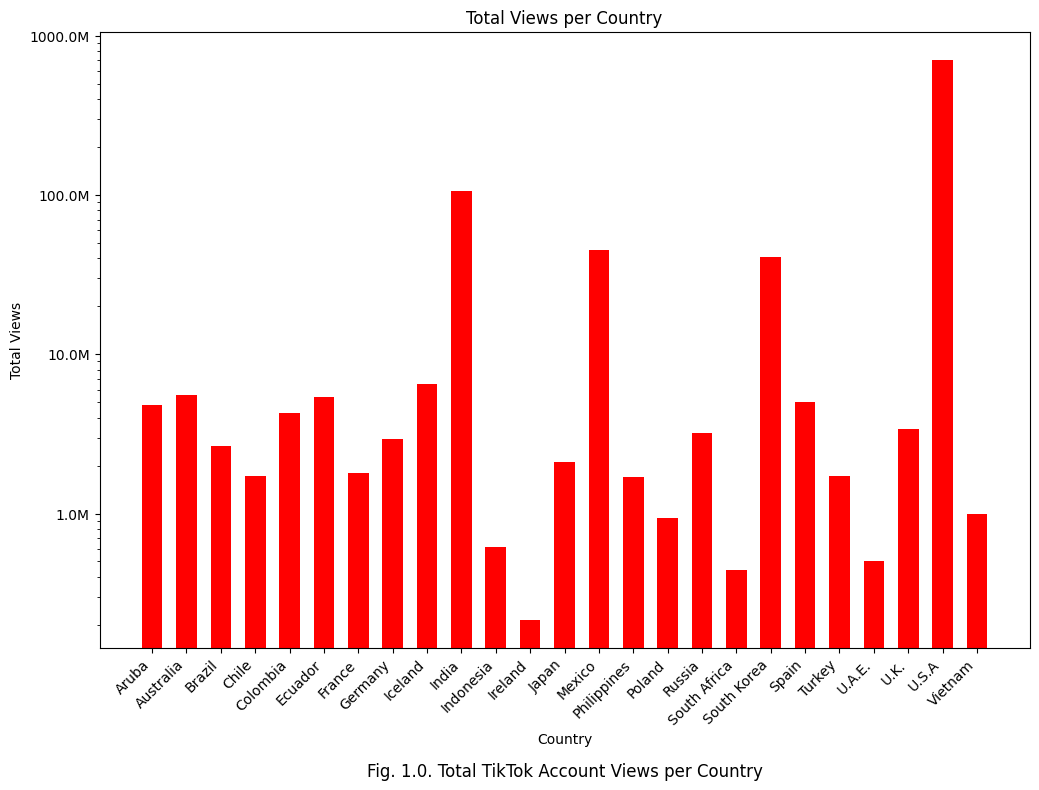

In [102]:
import matplotlib.pyplot as plt

# Create bar graph
x_y_data = df.groupby('Country')['Views'].sum().reset_index()

# Function to set y axis
def format_y_axis(x, pos):
    if x >= 1e6:
        return f'{x * 1e-6:.1f}M'
    if x >= 1e3:
        return f'{x * 1e-3:.1f}K'
    return str(int(x))

plt.figure(figsize=(12, 8)) 
bars = plt.bar(x_y_data['Country'], x_y_data['Views'], color='red', width=0.6)

plt.xticks(rotation=45, ha='right')  
plt.yscale('log')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_y_axis))

plt.xlabel('Country')
plt.ylabel('Total Views')
plt.title('Total Views per Country')
plt.text(0.5, -0.20, 'Fig. 1.0. Total TikTok Account Views per Country',
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
plt.show()

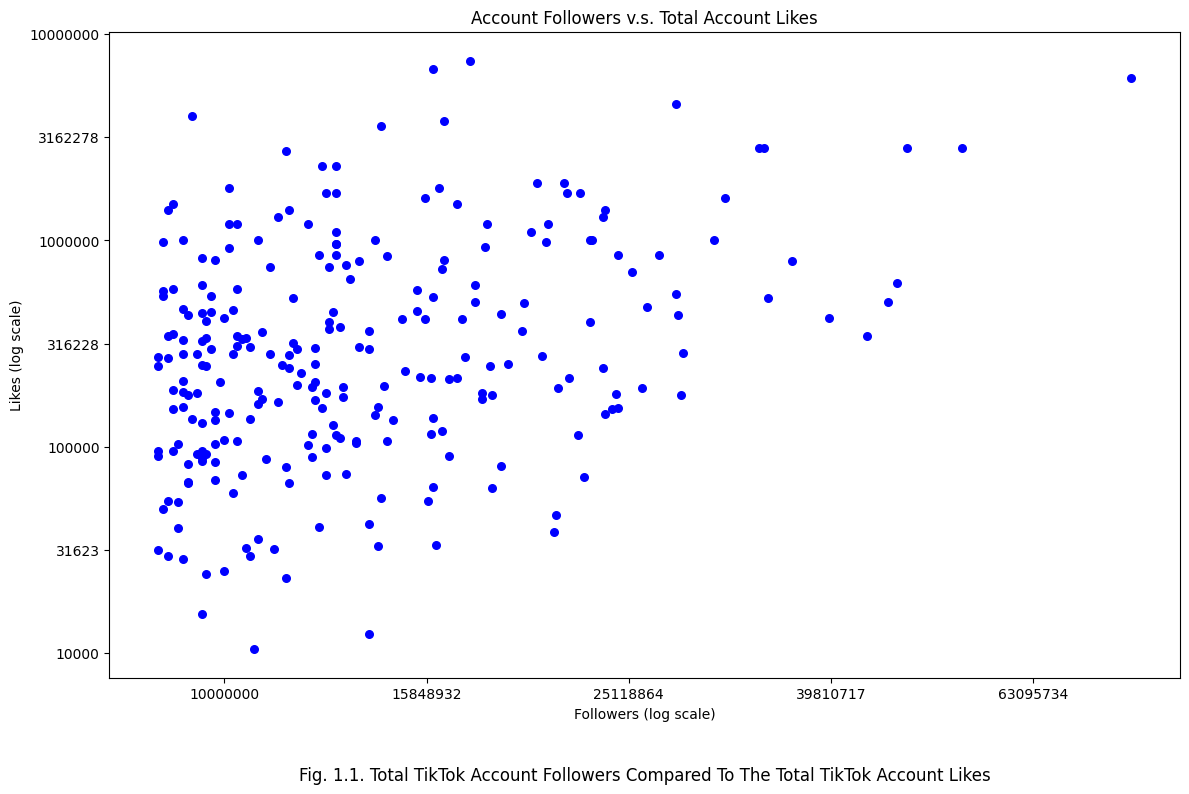

In [103]:
from matplotlib.ticker import FuncFormatter
import numpy as np

# Create Scatter Plot
plt.figure(figsize=(12, 8))

# log encoding 
plt.scatter(np.log10(df['Followers']), np.log10(df['Likes']), color='blue', s=30) 


# formatter function
def format_axis(x, pos):
    return f'{10**x:.0f}'

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_axis))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_axis))

plt.xlabel('Followers (log scale)')
plt.ylabel('Likes (log scale)')
plt.title('Account Followers v.s. Total Account Likes')

plt.text(0.5, -0.15, 'Fig. 1.1. Total TikTok Account Followers Compared To The Total TikTok Account Likes',
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()
plt.show()

In [104]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Scale analytics

# Scale values down by using the log of it
df['Followers'] = np.log1p(df['Followers'])
df['Views'] = np.log1p(df['Views'])
df['Likes'] = np.log1p(df['Likes'])
df['Engagement'] = np.log1p(df['Engagement'])

# Normalization
# Scale the columns value down to fit between a range of 0 to 1, 
scaler = MinMaxScaler()
df[['Followers', 'Views', 'Likes', 'Engagement']] = scaler.fit_transform(df[['Followers', 'Views', 'Likes', 'Engagement']])

df

,Country,Followers,Views,Likes,Engagement,Genre
0,U.S.A,1.000000,0.948339,0.970540,0.420301,"Dancing, Lipsyncing, Lifestyle"
1,U.S.A,0.826401,0.786001,0.851800,0.554876,"Dancing, Lipsyncing"
2,U.S.A,0.769145,0.824683,0.851800,0.400681,"Comedy, Illusion"
3,U.S.A,0.759504,0.553570,0.622535,0.520088,"Dancing, Lipsyncing"
4,U.S.A,0.749653,0.724938,0.590006,0.043463,NaN
...,...,...,...,...,...,...
251,India,0.000000,0.251566,0.168002,0.082872,"Comedy, Acting"
252,U.S.A,0.000000,0.301227,0.336169,0.354504,"Comedy, Lifestyle"
253,Russia,0.000000,0.443337,0.495808,0.433325,"Lipsyncing, Promotion, Lifestyle"
254,U.S.A,0.000000,0.383748,0.480564,0.614225,"Lipsyncing, Promotion, Lifestyle"


In [105]:
# Check how many column values are null
df.isna().sum()

Country       0
Followers     0
Views         0
Likes         0
Engagement    0
Genre         2
dtype: int64

In [106]:
# Fill in missing/null values
df["Genre"] = df["Genre"].fillna("noGenre")

In [107]:
# Check to make sure there no null values
df.isna().sum()

Country       0
Followers     0
Views         0
Likes         0
Engagement    0
Genre         0
dtype: int64

In [108]:
df

,Country,Followers,Views,Likes,Engagement,Genre
0,U.S.A,1.000000,0.948339,0.970540,0.420301,"Dancing, Lipsyncing, Lifestyle"
1,U.S.A,0.826401,0.786001,0.851800,0.554876,"Dancing, Lipsyncing"
2,U.S.A,0.769145,0.824683,0.851800,0.400681,"Comedy, Illusion"
3,U.S.A,0.759504,0.553570,0.622535,0.520088,"Dancing, Lipsyncing"
4,U.S.A,0.749653,0.724938,0.590006,0.043463,noGenre
...,...,...,...,...,...,...
251,India,0.000000,0.251566,0.168002,0.082872,"Comedy, Acting"
252,U.S.A,0.000000,0.301227,0.336169,0.354504,"Comedy, Lifestyle"
253,Russia,0.000000,0.443337,0.495808,0.433325,"Lipsyncing, Promotion, Lifestyle"
254,U.S.A,0.000000,0.383748,0.480564,0.614225,"Lipsyncing, Promotion, Lifestyle"


In [109]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split the Genre column into separate genres
df['Genre'] = df['Genre'].str.split(', ')

# Turn genres into numerical values
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df['Genre']), columns=mlb.classes_, index=df.index)
df = pd.concat([df.drop(columns=['Genre']), genre_encoded], axis=1)

df

,Country,Followers,Views,Likes,Engagement,Acting,Art,Comedy,Content House,DIY,...,Pets,Photography,Pranking,Pranking,Promotion,Reacting,Relationship,Reviews,Singing,noGenre
0,U.S.A,1.000000,0.948339,0.970540,0.420301,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,U.S.A,0.826401,0.786001,0.851800,0.554876,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,U.S.A,0.769145,0.824683,0.851800,0.400681,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,U.S.A,0.759504,0.553570,0.622535,0.520088,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,U.S.A,0.749653,0.724938,0.590006,0.043463,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,India,0.000000,0.251566,0.168002,0.082872,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
252,U.S.A,0.000000,0.301227,0.336169,0.354504,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
253,Russia,0.000000,0.443337,0.495808,0.433325,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
254,U.S.A,0.000000,0.383748,0.480564,0.614225,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [110]:
# Encode countries into numerical values
df = pd.get_dummies(df, columns=['Country'])

# Convert booleans into integer type
country_columns = [col for col in df.columns if 'Country_' in col]
df[country_columns] = df[country_columns].astype(int)

df

,Followers,Views,Likes,Engagement,Acting,Art,Comedy,Content House,DIY,Dancing,...,Country_Poland,Country_Russia,Country_South Africa,Country_South Korea,Country_Spain,Country_Turkey,Country_U.A.E.,Country_U.K.,Country_U.S.A,Country_Vietnam
0,1.000000,0.948339,0.970540,0.420301,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.826401,0.786001,0.851800,0.554876,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.769145,0.824683,0.851800,0.400681,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.759504,0.553570,0.622535,0.520088,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.749653,0.724938,0.590006,0.043463,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.000000,0.251566,0.168002,0.082872,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,0.000000,0.301227,0.336169,0.354504,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
253,0.000000,0.443337,0.495808,0.433325,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
254,0.000000,0.383748,0.480564,0.614225,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [111]:
# Write preprocessed data to csv
file_path = "../processedDataset/preprocessedAccountData.csv"
df.to_csv(file_path, index=False)

# display column types
df.dtypes

Followers                float64
Views                    float64
Likes                    float64
Engagement               float64
Acting                     int64
Art                        int64
Comedy                     int64
Content House              int64
DIY                        int64
Dancing                    int64
Dancing                    int64
Education                  int64
Family                     int64
Family                     int64
Fitness                    int64
Food                       int64
Highlights                 int64
Illusion                   int64
Lifestyle                  int64
Lipsyncing                 int64
Lipsyncing                 int64
Makeup                     int64
Media                      int64
Motivational Speaking      int64
Parkour                    int64
Pets                       int64
Photography                int64
Pranking                   int64
Pranking                   int64
Promotion                  int64
Reacting  

***Training and Testing our Model***

In this section we are looking to...

- Split the data into an independent and dependent variables
- Use our model to predict a COUNTRY


In [112]:
# Split data into x values
x = df.filter(regex='^(Followers|Views|Likes|Engagement)')
x

,Followers,Views,Likes,Engagement
0,1.000000,0.948339,0.970540,0.420301
1,0.826401,0.786001,0.851800,0.554876
2,0.769145,0.824683,0.851800,0.400681
3,0.759504,0.553570,0.622535,0.520088
4,0.749653,0.724938,0.590006,0.043463
...,...,...,...,...
251,0.000000,0.251566,0.168002,0.082872
252,0.000000,0.301227,0.336169,0.354504
253,0.000000,0.443337,0.495808,0.433325
254,0.000000,0.383748,0.480564,0.614225


In [113]:
# Split data into y values
y = df.filter(regex='^Country_', axis=1)
y

,Country_Aruba,Country_Australia,Country_Brazil,Country_Chile,Country_Colombia,Country_Ecuador,Country_France,Country_Germany,Country_Iceland,Country_India,...,Country_Poland,Country_Russia,Country_South Africa,Country_South Korea,Country_Spain,Country_Turkey,Country_U.A.E.,Country_U.K.,Country_U.S.A,Country_Vietnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
253,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X and y are defined and imported properly
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize  LinearRegression
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results in a DataFrame
results = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Mean Squared Error (MSE)': [train_mse, test_mse],
    'R-squared (R^2) Score': [train_r2, test_r2]
})

results

,Dataset,Mean Squared Error (MSE),R-squared (R^2) Score
0,Training,0.019531,0.163178
1,Test,0.019237,0.036386


In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, max_depth=5, min_samples_split=5, min_samples_leaf=3)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_hamming_loss = hamming_loss(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_hamming_loss = hamming_loss(y_test, y_test_pred)

# Prepare data for table
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Hamming Loss'],
    'Training Set': [train_accuracy, train_hamming_loss],
    'Test Set': [test_accuracy, test_hamming_loss]
})

# Create DataFrame
results

,Metric,Training Set,Test Set
0,Accuracy,0.710784,0.634615
1,Hamming Loss,0.018431,0.026154


In [116]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# # Assuming X_train, X_test, y_train, y_test are defined properly
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Define base classifier with parameters
# base_classifier = RandomForestClassifier(random_state=42)

# # Define parameters for GridSearchCV
# param_grid = {
#     'estimator__n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'estimator__max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
#     'estimator__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'estimator__min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
# }

# # Initialize MultiOutputClassifier with base classifier and parameters
# model = MultiOutputClassifier(base_classifier, n_jobs=-1)

# # Perform Grid Search CV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Print the best parameters and the corresponding accuracy
# print("Best Parameters found by Grid Search CV:")
# print(grid_search.best_params_)
# best_model = grid_search.best_estimator_

# # Evaluate the best model on the test set
# y_test_pred = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print("Test Accuracy (Random Forest - MultiOutputClassifier):", test_accuracy)


***Training and Testing our Model***

In this section we are looking to...

- Split the data into an independent and dependent variables
- Use our model to predict # of FOLLOWERS


In [117]:
# Split data into x values
x = df.filter(regex='^(Views|Likes|Engagement)')
x

,Views,Likes,Engagement
0,0.948339,0.970540,0.420301
1,0.786001,0.851800,0.554876
2,0.824683,0.851800,0.400681
3,0.553570,0.622535,0.520088
4,0.724938,0.590006,0.043463
...,...,...,...
251,0.251566,0.168002,0.082872
252,0.301227,0.336169,0.354504
253,0.443337,0.495808,0.433325
254,0.383748,0.480564,0.614225


In [118]:
# Split data into x values
y = df.filter(regex='^Followers')

y

,Followers
0,1.000000
1,0.826401
2,0.769145
3,0.759504
4,0.749653
...,...
251,0.000000
252,0.000000
253,0.000000
254,0.000000


In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming x and y are defined properly
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize LinearRegression model
model = LinearRegression()

# Fit the model
model.fit(x_train, y_train)

# Predict on the training set
y_train_pred = model.predict(x_train)

# Predict on the test set
y_test_pred = model.predict(x_test)

# Calculate Mean Squared Error (MSE) and R-squared (R^2) for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) and R-squared (R^2) for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results in a DataFrame
results = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Mean Squared Error (MSE)': [train_mse, test_mse],
    'R-squared (R^2) Score': [train_r2, test_r2]
})

results


,Dataset,Mean Squared Error (MSE),R-squared (R^2) Score
0,Training,0.026929,0.184565
1,Test,0.031847,0.151404


In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Assuming x and y are defined properly
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ensure y is a 1-dimensional array
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Initialize RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Fit the model
model.fit(x_train, y_train)

# Predict on the training set
y_train_pred = model.predict(x_train)

# Predict on the test set
y_test_pred = model.predict(x_test)

# Calculate Mean Squared Error (MSE) and R-squared (R^2) for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Error (MSE) and R-squared (R^2) for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results in a formatted DataFrame
results = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Mean Squared Error (MSE)': [train_mse, test_mse],
    'R-squared (R^2) Score': [train_r2, test_r2]
})

# Print the formatted DataFrame
results

,Dataset,Mean Squared Error (MSE),R-squared (R^2) Score
0,Training,0.005168,0.843500
1,Test,0.030223,0.194658


***Training and Testing our Model***

In this section we are looking to...

- Split the data into an independent and dependent variables
- Use our model to predict a GENRE
